## Wine dataset
**Name:**weizhuo xiong
** ID: **914443957

We will be looking at a dataset that consists of wine statistics by wine category.  

(1) Modify the following to see the head of the wine data file.  (You should specify the relative path of the data.)

In [1]:
f= open('wine.data.txt','r')
print f.readline()
f.close()

#The next 14 lines are the variable names, then the remaining lines are the data in csv



As you can see, the first several lines are the variable names and the remainder is comma separated lines of numbers.  

(2) Create a file object with open(), and then read in the lines in sequence.  Disregard the first line, read the next 14 in and save the variable names in a list, and save the rest in a list of lists of numbers (each line forms a list by splitting by commas).

In [2]:
f= open('wine.data.txt','r')
f.readline()
data=[row for row in f]
colume_name=[ item[:-1] for item in data[0:14]]
wine_data=[]
for item in data[14:]:
    wine,_ = item.split('\n')
    wine_data.append([float(each) for each in wine.split(',')])
f.close()   
##print colume_name
##print wine_data[0:2]

['Wine Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline            ']
[[1.0, 14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0], [1.0, 13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0]]


(3) Import numpy and save the list of lists as an array object, where the entries are floats.

In [3]:
import numpy as np
wine_data = np.array(wine_data)
##print(wine_data[:2])

[[  1.00000000e+00   1.42300000e+01   1.71000000e+00   2.43000000e+00
    1.56000000e+01   1.27000000e+02   2.80000000e+00   3.06000000e+00
    2.80000000e-01   2.29000000e+00   5.64000000e+00   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.00000000e+00   1.32000000e+01   1.78000000e+00   2.14000000e+00
    1.12000000e+01   1.00000000e+02   2.65000000e+00   2.76000000e+00
    2.60000000e-01   1.28000000e+00   4.38000000e+00   1.05000000e+00
    3.40000000e+00   1.05000000e+03]]


(4) Print the sample mean and standard deviations of each column (variable).

In [4]:
print 'sample mean\n', np.mean(wine_data, axis=0)
print 'standard deviation\n',np.std(wine_data, axis=0)

sample mean
[  1.93820225e+00   1.30006180e+01   2.33634831e+00   2.36651685e+00
   1.94949438e+01   9.97415730e+01   2.29511236e+00   2.02926966e+00
   3.61853933e-01   1.59089888e+00   5.05808988e+00   9.57449438e-01
   2.61168539e+00   7.46893258e+02]
standard deviation
[  7.72854859e-01   8.09542915e-01   1.11400363e+00   2.73572294e-01
   3.33016976e+00   1.42423077e+01   6.24090564e-01   9.96048950e-01
   1.24103260e-01   5.70748849e-01   2.31176466e+00   2.27928607e-01
   7.07993265e-01   3.14021657e+02]


(5) Normalize the data matrix by subtracting each column mean and divide by the column standard deviation for each column.

In [5]:
wine_data2 = wine_data.copy()
wine_data2 = (wine_data2 - np.mean(wine_data, axis=0))/np.std(wine_data, axis=0)
np.mean(wine_data2, axis=0)

(6) Save the number of rows of the matrix as n.

In [28]:
n,m = np.shape(wine_data)
##print n

178


(7) The correlation matrix of a normalized matrix X can be computed as $$\frac{1}{n-1}X^\top X$$  Compute this. 

In [7]:
Cov = np.dot(wine_data2.T, wine_data2)/(n-1)
print Cov

[[ 1.00564972 -0.3300763   0.44024952 -0.04992369  0.52078487 -0.21036119
  -0.72322641 -0.85228566  0.49187249 -0.50194977  0.26716852 -0.62085717
  -0.79268286 -0.63729711]
 [-0.3300763   1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816
   0.29073446  0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255
   0.07275191  0.64735687]
 [ 0.44024952  0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343
  -0.3370606  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685
  -0.37079354 -0.19309537]
 [-0.04992369  0.21273976  0.16497228  1.00564972  0.44587209  0.28820583
   0.12970824  0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874
   0.00393333  0.22488969]
 [ 0.52078487 -0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039
  -0.32292752 -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299
  -0.27833221 -0.44308618]
 [-0.21036119  0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972
   0.21561254  0.19688989 -0.25774204  0.23777643  0

(8) Use the following code to print an image that corresponds to the correlation matrix.

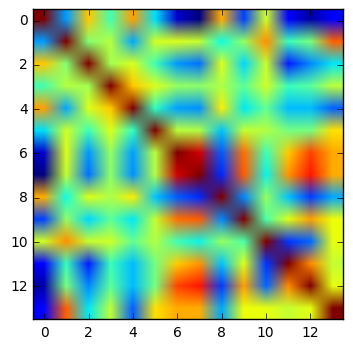

In [8]:
from matplotlib import pyplot as plt
plt.imshow(Cov)
plt.show()

The following computes F-scores for individual ANOVAs for each variable by class.  If you get finished early try to figure out what's going on.

In [27]:
X = wine_data.copy()
N = np.array([(X[:,0] == i+1).sum() for i in range(3)])
V = np.array([X[X[:,0] == i+1,1:].var(axis=0) for i in range(3)])
M = np.array([X[X[:,0] == i+1,1:].mean(axis=0) for i in range(3)])
Bvar = (((M - X[:,1:].mean(axis=0))**2.).T * N).sum(axis=1) / 2
Wvar = (V.T * (N-1)).sum(axis=1) / (n - 3)
F = Bvar / Wvar

**N:**count the number of wine in different class

**V:**group data by class, and there will be three class. Calculate variance of each wine data(total 13), and get 3*13 matrix  

**M:**group data by class, and there will be three class. Calculate mean of each wine data(total 13), and get 3*13 matrix 

**Bvar:**use group mean minus mean of all data, then calculate square and multiply by number of each class. After that, divide value with 2 degree of freedom 

**Wvar:**use group variance multiply number of each group minus 1, sum same value in different group and divide it by 178 degree of freedom

**F**:divide Bvar with Wvar and get F scores

In [20]:
print F

[ 137.3861116    37.58265615   13.5260966    36.35357397   12.62981408
   95.24380219  237.53617769   28.0471868    30.76266898  122.99581166
  102.9202907   192.99700461  211.40023981]
